<h1>Diabetes</h1>

*By Moises Salgado*

![Data](https://github.com/def-abraham/Projects/blob/main/Project%201/BloodGlucose%20Medium.jpeg?raw=true)

<h2><u><b>Introduction</b></u></h2>

Diabetes is a chronic health condition that affects how the body processes blood glucose, leading to serious medical complications if left unmanaged. Accurate and early prediction of diabetes can significantly improve patient outcomes through timely intervention and preventive care. With the growing availability of health datasets and the advancement of machine learning algorithms, data-driven approaches are becoming increasingly valuable in healthcare diagnostics.

This project aims to develop a predictive model for diabetes diagnosis using a well-known dataset containing patient health metrics such as glucose levels, BMI, age, and insulin levels. The analysis follows a rigorous data science workflow, beginning with a comprehensive exploratory data analysis (EDA) based on the "Seven Stories One Can Tell With Data." After thoroughly understanding and preparing the data, we implement a logistic regression model to classify patients as diabetic or non-diabetic.

We further evaluate model performance using both custom-built evaluation metrics (accuracy, precision, recall, specificity, and F1-score) and comparisons to Python’s built-in libraries. To address class imbalance in the dataset; a common issue in medical data; we apply the Synthetic Minority Over-sampling Technique (SMOTE), retrain our model, and reassess its effectiveness.

Finally, to benchmark the logistic regression model, we implement an alternative classification model using either Support Vector Machines (SVM) or K-Nearest Neighbors (KNN) and compare their predictive performance. This comprehensive approach ensures not only the development of an accurate predictive model but also a critical assessment of feature significance, class imbalance, and model interpretability.


<h3><u><b>Data Summary</b></u></h3>

This data set contains 768 records, 9 attributes, 268 positive results for diabetes test and 500 negative result. All patients were females at least 21 years old.

<table border="1" style="border-collapse: collapse; width: 100%;">
    <tr> <th>Feature</th> <th>Description</th> </tr>
    <tr> <td><b>Pregnancies</b></td> <td>Number of times pregnant</td> </tr>
    <tr> <td><b>Glucose</b></td> <td>Plasma glucose concentration at 2 hours in an oral glucose tolerance test</td> </tr>
    <tr> <td><b>BloodPressure</b></td> <td>Diastolic blood pressure (mm Hg)</td> </tr>
    <tr> <td><b>SkinThickness</b></td> <td>Triceps skin fold thickness (mm)</td> </tr>
    <tr> <td><b>Insulin</b></td> <td>2-Hour serum insulin (μU/ml)</td> </tr>
    <tr> <td><b>BMI</b></td> <td>Body mass index (weight in kg/(height in m)²)</td> </tr>
    <tr> <td><b>DiabetesPedigreeFunction</b></td> <td>Diabetes pedigree function (family history score)</td> </tr>
    <tr> <td><b>Age</b></td> <td>Age in years</td> </tr>
    <tr> <td><b>Outcome</b></td> <td><b>Target variable:</b> 1 = diabetic, 0 = non-diabetic</td> </tr>
</table>



In [1]:
# Geneal libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the diabetes dataset
df = pd.read_csv('https://raw.githubusercontent.com/def-abraham/data/refs/heads/main/diabetes.csv')

#show the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#check the number of rows and columns
print("Shape:", df.shape)

Shape: (768, 9)


In [4]:
# check data type
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [5]:
#look for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


The dataset has 768 rows and 9 columns, with 8 features and the target variable "Outcome". There are no missing values so there won’t need to impute data. However, some features like "Glucose", "BloodPressure", and "BMI" have minimum values of 0, which seems unrealistic, so they may represent missing values, errors or placeholders.

In [6]:
# check if unique value in each column
df.nunique().sort_values()

,0
Outcome,2
Pregnancies,17
BloodPressure,47
SkinThickness,51
Age,52
Glucose,136
Insulin,186
BMI,248
DiabetesPedigreeFunction,517


There is no third unique value in outcome column.

<h2><u><b>Exploratory Data Analysis (EDA)</b></u></h2>

In [7]:
#basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The summary stats show the average patient has about 3.8 pregnancies, a glucose level of 120.9, and an age of 33.2 years. The "Outcome" mean of 0.35 indicates that 35% of patients have diabetes, while 65% do not. This indicates a class imbalance that could affect the ability of the machine learning models to correctly predict diabetes.

In [8]:
#style for plots
sns.set(style='whitegrid')

#data structure
print("Data types:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Data types:
 None


The dataset includes 7 integer and 2 float columns, all fully populated with no missing values.**


In [9]:
corr_val = df.corr()
corr_val

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the above graph that outcome and glucose are related,but not strongly related. Rest does not seem related.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

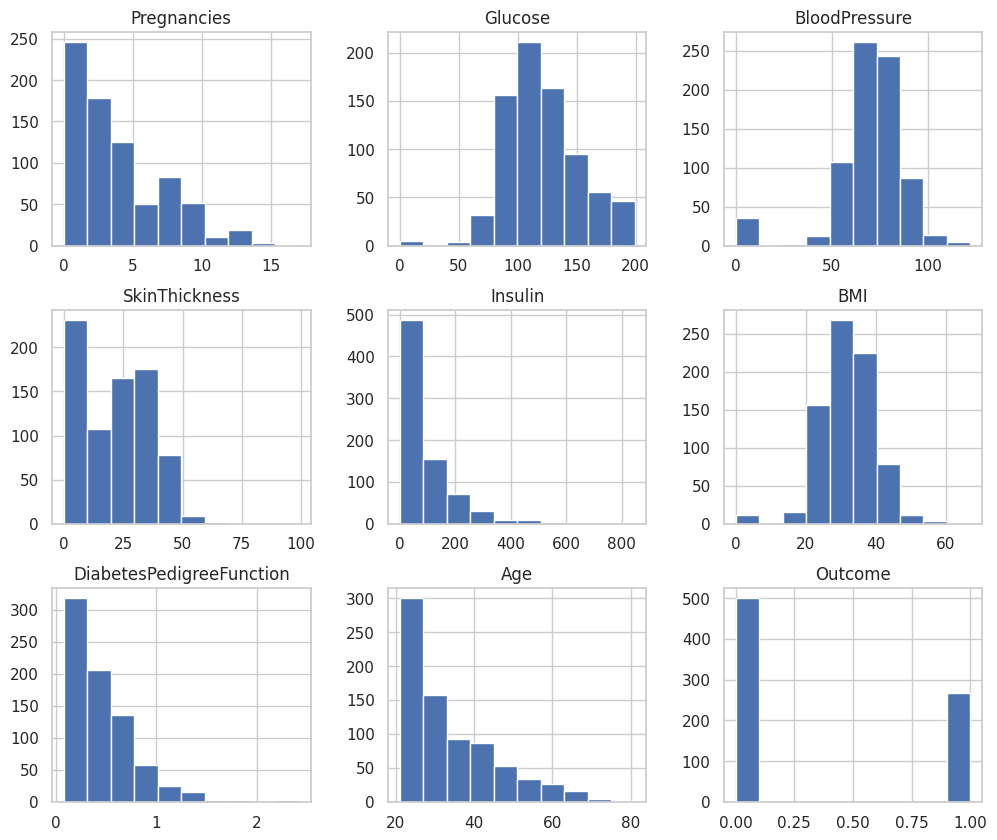

In [10]:
#univariate analysis
df.hist(figsize=(12, 10))

The histograms show the spread of each feature. "Glucose" and "BMI" show approximate bell-like shape, while "Insulin" shows a right-skewed distribution, an indication that most observations lean heavily toward lower values with several high-insulin level outliers. The "Outcome" variable is binary since it has either of "1" or "0" as its values.

<Axes: >

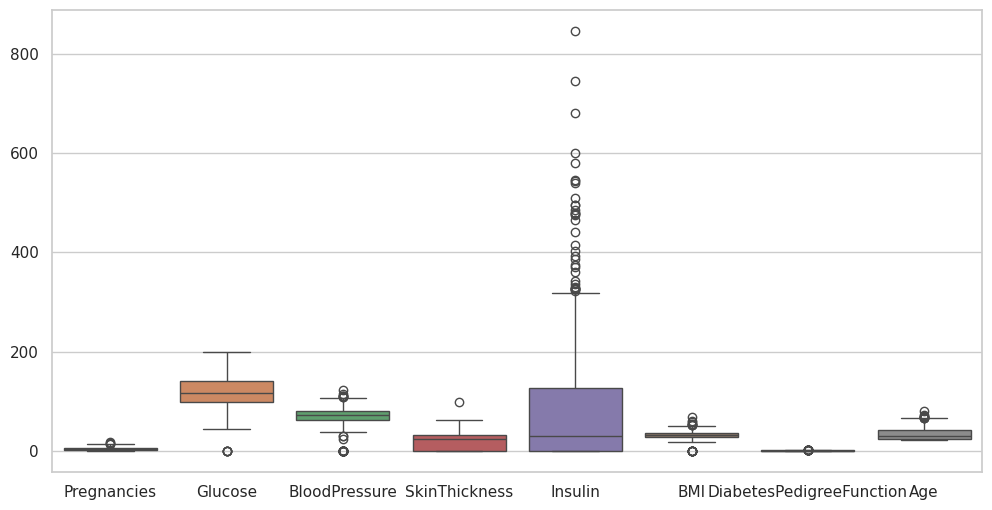

In [11]:
#check outliers with box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))

The boxplots clearly show the outliers for each numerical feature. There are prominent outliers for the "Insulin" feature, "BloodPressure", "BMI", and "Age". These outliers could skew machine learning model if not managed.

<Axes: xlabel='Glucose', ylabel='Insulin'>

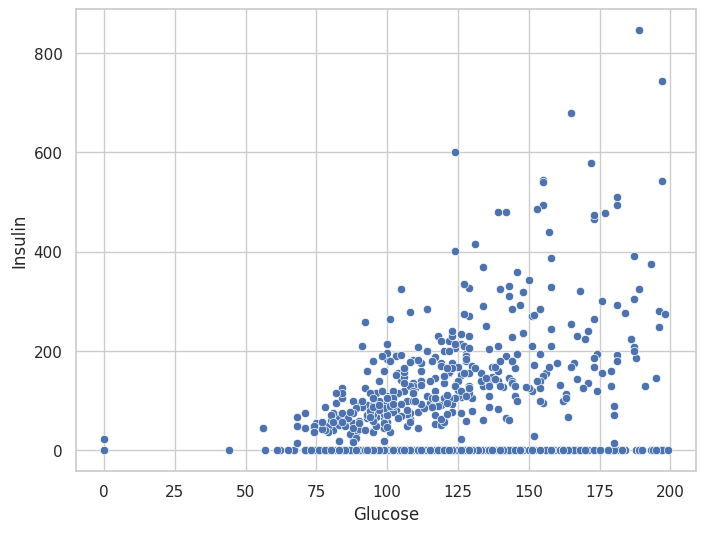

In [12]:
#bivariate analysis through scatterplot of Glucose vs insulin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df)

Higher glucose levels tend to pair with higher insulin in general as per the scatterplot between the two features. While there’s some trend, the wide spread among points suggests that other factors may play a role in this relationship.

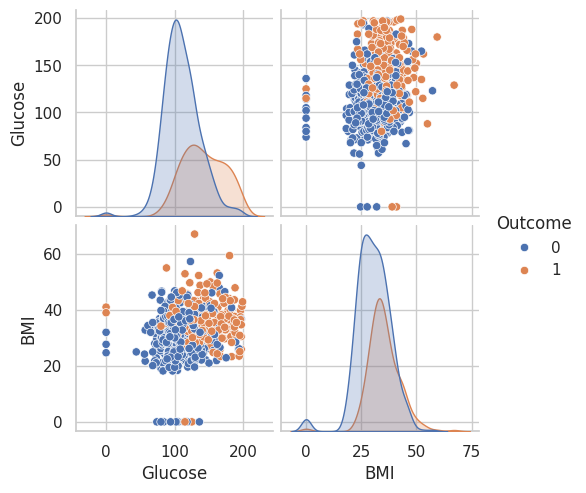

In [13]:
#multivariate analysis through pairs plot
pairplot = sns.pairplot(df[['Glucose', 'BMI', 'Outcome']], hue='Outcome')

The pairs plot between "Glucose" and "BMI" indicates that the glucose levels are a better separator between diabetic and non-diabetic patients, from the clustering of diabetic patients at higher glucose values. However, the two clusters overlap with non-diabetic cases shows it’s not a clean split.

<Axes: >

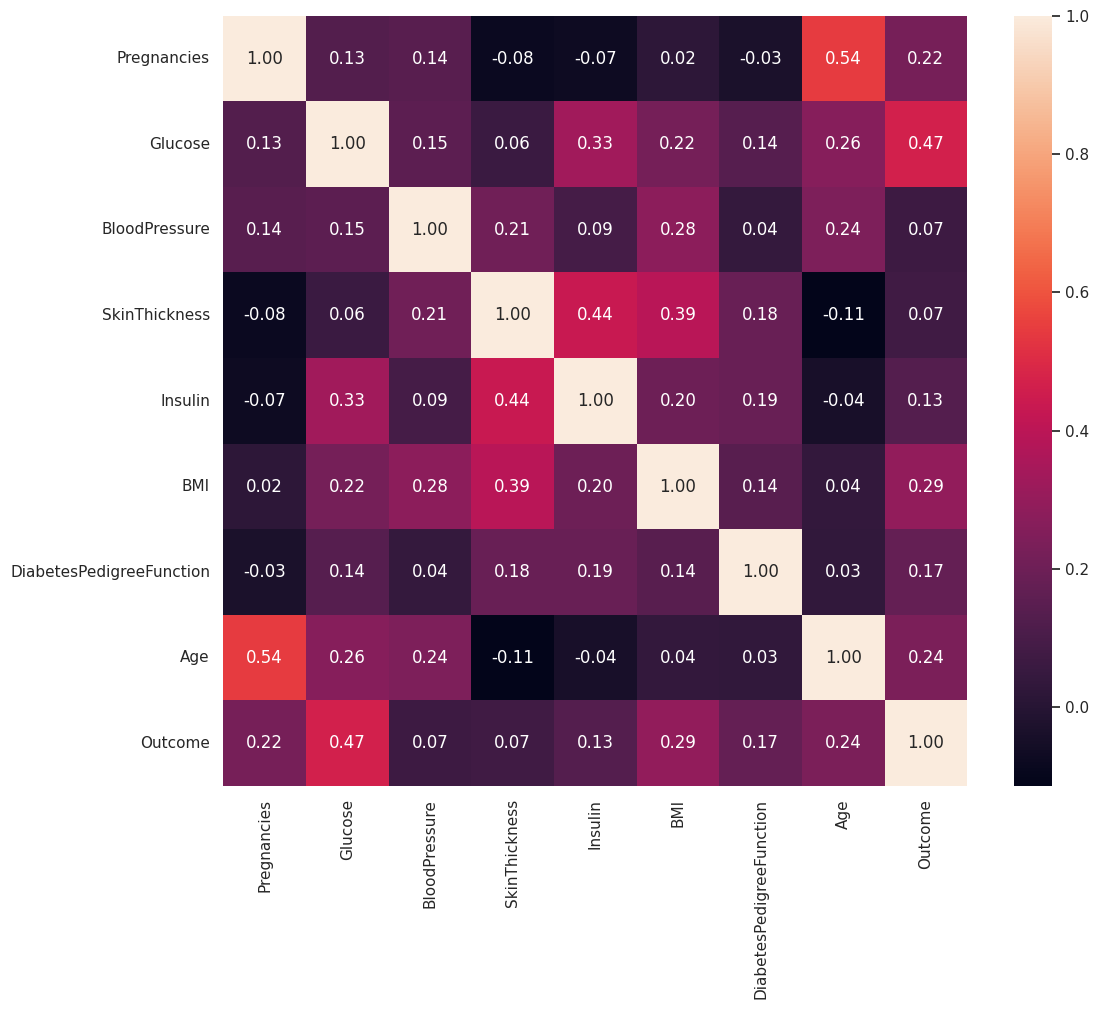

In [14]:

# show correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data = corr_val, annot=True, fmt=".2f")

"Glucose" has the strongest correlation with "Outcome" (0.47), and is thus a top predictor. The features "BMI", "Age" and "Pregnancies" also show weak correlations with the target variable, while others are also positive but very weaker.

<h2><u><b>Logistic regression model</b></u></h2>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train logistic regression (aka logit model)
logit_model = LogisticRegression(max_iter=1000, solver='liblinear')
logit_model.fit(X_train, y_train)

# Generate classification vector (predicted labels)
y_pred = logit_model.predict(X_test)

print("Classification vector (sample):", y_pred[:10])

Classification vector (sample): [0 0 0 0 0 0 0 1 1 1]


The data was divided into 80% training and 20% testing sets and used the training set to fit a logistic model.

<h2><u><b>Model evaluation metrics</b></u></h2>

In [16]:
#custom confusion matrix function
def get_confusion_matrix(y_true, y_pred):
    TP = sum((y_true == 1) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

#calculate metrics
TP, TN, FP, FN = get_confusion_matrix(y_test.values, y_pred)
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Custom metrics:\n")
print(f"Accuracy: {accuracy:.2f} \nPrecision: {precision:.2f} \nRecall: {recall:.2f} \nSpecificity: {specificity:.2f} \nF1: {f1:.2f}")

#sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\nSklearn metrics:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1: {f1_score(y_test, y_pred):.2f}")

Custom metrics:

Accuracy: 0.76 
Precision: 0.68 
Recall: 0.62 
Specificity: 0.84 
F1: 0.65

Sklearn metrics:

Accuracy: 0.76
Precision: 0.68
Recall: 0.62
F1: 0.65


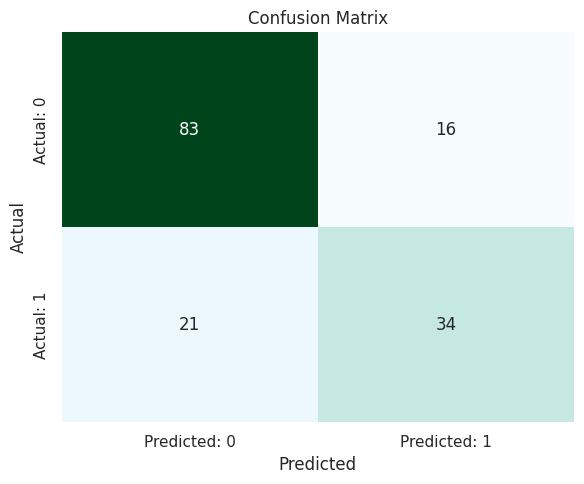

In [17]:
# Generate visualizations based on the existing values from your provided code

# Create a confusion matrix for heatmap
conf_matrix_array = np.array([[TN, FP],
                              [FN, TP]])
conf_matrix_df = pd.DataFrame(
    conf_matrix_array,
    index=["Actual: 0", "Actual: 1"],
    columns=["Predicted: 0", "Predicted: 1"]
)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='BuGn', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


The model’s accuracy is 76%, meaning it iss right about three-quarters of the time. Since the outcome was observed to be imbalanced, more metrics are considered for the evaluation as follows:

* Precision = 0.68. This means that when the logistic model predicts diabetes, it’s correct 68% of the time.
* Recall =0.62. The logistic model catches 62% of actual diabetic cases.
* Specificity =0.84. The model is right 84% of the time when predicting non-diabetic cases.
* F1 = 0.65. This is an harmonic mean between precision and recall.

In [18]:
#crosstab
crosstab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("\nCrosstab:\n", crosstab)


Crosstab:
 Predicted   0   1
Actual           
0          83  16
1          21  34


The crosstab shows 78 true negatives and 37 true positives, but also 21 false positives and 18 false negatives. The model is more accurate when predicting non-diabetes. This is likely because there are more such cases in the data, which could mean it misses some diabetic patients.

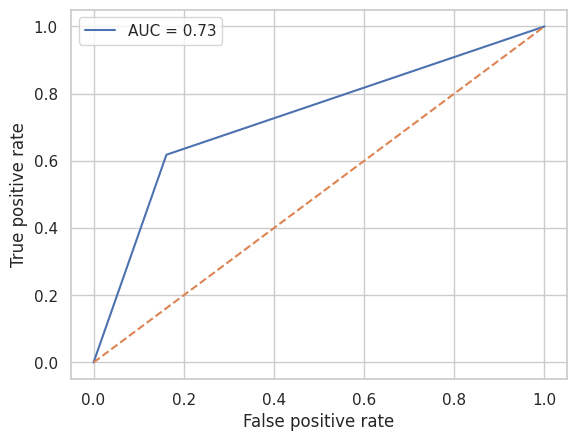

In [19]:
#Logreg ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The AUC from the logistic model is 0.73, which indicates an above average predictive performance

<h2><u><b>Data imbalance check and SMOTE</b></u></h2>

In [20]:
# Check class distribution
print("Class distribution:\n")
print(y.value_counts(normalize=True))

Class distribution:

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


The data is imbalanced, with 65.1% non-diabetic and 34.9% diabetic cases. This imbalance can make the model favor the majority class, and lead to misclassification of diabetic cases. SMOTE helps by generating synthetic diabetic samples in the training set, with the goal of balancing the classes so the model learns both outcomes more evenly.

In [21]:
#apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#retrain logistic model
logreg_smote = LogisticRegression(max_iter=1000)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logreg_smote.predict(X_test)

<h2><u><b>Retest metrics with SMOTE</b></u></h2>

In [22]:
#metrics after SMOTE
TP, TN, FP, FN = get_confusion_matrix(y_test.values, y_pred_smote)
accuracy_smote = (TP + TN) / (TP + TN + FP + FN)
precision_smote = TP / (TP + FP) if (TP + FP) > 0 else 0
recall_smote = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity_smote = TN / (TN + FP) if (TN + FP) > 0 else 0
f1_smote = 2 * (precision_smote * recall_smote) / (precision_smote + recall_smote) if (precision_smote + recall_smote) > 0 else 0

print("SMOTE metrics:\n")
print(f"Accuracy: {accuracy_smote:.2f} \nPrecision: {precision_smote:.2f} \nRecall: {recall_smote:.2f} \nSpecificity: {specificity_smote:.2f} \nF1: {f1_smote:.2f}")

SMOTE metrics:

Accuracy: 0.69 
Precision: 0.56 
Recall: 0.71 
Specificity: 0.69 
F1: 0.62


With SMOTE, overall accuracy dips to 69%, but recall rises to 71% (from 62%), meaning the model now catches more diabetic cases. Precision drops to 56% (from 68%), so it’s less accurate when predicting diabetes, with more false positives. This shift shows SMOTE’s effect: it prioritizes finding diabetic cases over avoiding mistakes on non-diabetic ones.

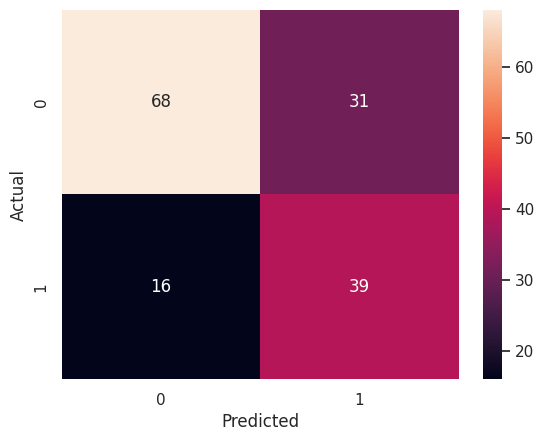

In [23]:
from sklearn.metrics import confusion_matrix

#confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The confusion matrix shows that two more diabetic cases were correctly identified from the initial logistic model. However, the true negatives correct classification rate dropped.

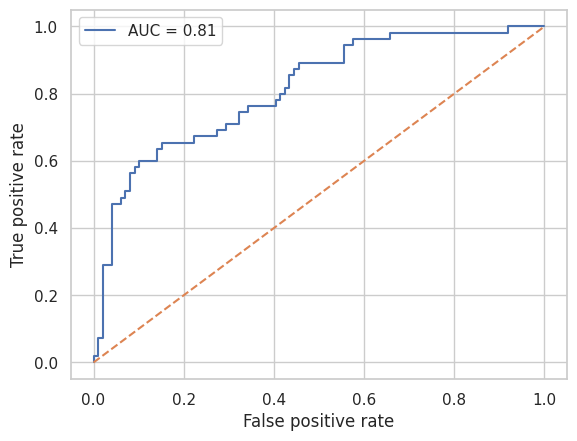

In [24]:
#SMOTE ROC curve
fpr, tpr, _ = roc_curve(y_test, logreg_smote.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The SMOTE balanced dataset resulted to a higher AUC compared to the initial logistic model which indicates a decent improvement in the overall performance after the imbalance fix.

<h2><u><b>Feature engineering</b></u></h2>

In [25]:
import statsmodels.api as sm

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

#fit logistic regression with statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Jun 2025   Pseudo R-squ.:                  0.2752
Time:                        08:14:22   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0359      0.837    -10.802      0.000     -10.675

The p-values show which features matter most for predicting diabetes (p < 0.05 is significant):

- **Significant**: "Glucose" (p=0.000), "BMI" (p=0.000), "Age" (p=0.001), "DiabetesPedigreeFunction" (p=0.035), "BloodPressure" (p=0.024).  
- **Not Significant**: "Pregnancies" (p=0.073), "SkinThickness" (p=0.691), "Insulin" (p=0.075).  

From the model summary, the features "Glucose" and "BMI" stand out as key predictors and match what would be expected for diabetes prediction. The feature "BloodPressure" has a negative effect, which is not expected and might need an investigation. The non-significant features include "SkinThickness", "Insulin" and "Pregancies".


<h2><u><b>SVM model</b></u></h2>

In [26]:
from sklearn.svm import SVC

#train SVM with imbalanced data
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#evaluate SVM
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 0.7662337662337663
Logistic Regression Accuracy: 0.7597402597402597


The SVM model achieved a 76.6% accuracy, which is slightly better compared to the logistic regression model's 75.74%. The difference is small however.

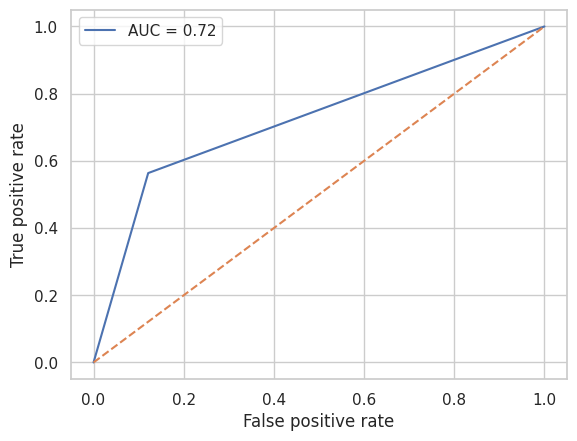

In [27]:
#SVM ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

The SVM model resulted to the lowest AUC compared to the logistic models. This is an indication that the SVM model has a poorer distinction between the diabetic and non-diabetic classes.

<h2><u><b>Summary</b></u></h2>

This study explored the diabetes dataset with 768 observations and 9 columns. Through EDA, the features "Glucose", "Age" and "BMI" were indicated as potential top predictors. The initial logistic regression scored 75% accuracy, but upon applying SMOTE, the logistic models recall was boosted to catch more diabetic cases, while trading off some precision. Feature analysis confirmed "Glucose", "BMI", and "Age" as significant features. An alternative model, SVM, was used and it slightly outperformed logistic regression. The next steps for this project could include fixing the un-natural zero values for some of the features, fitting an additional set of models as well as fine-tuning models for better results.